<a href="https://colab.research.google.com/github/sujal029/Restaurant-EDA-Project/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Restaurant Ratings
    A. Analyze the distribution of aggregate ratings and determine the most common rating range.
    B. Calculate the average number of votes received by restaurants.
    

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN

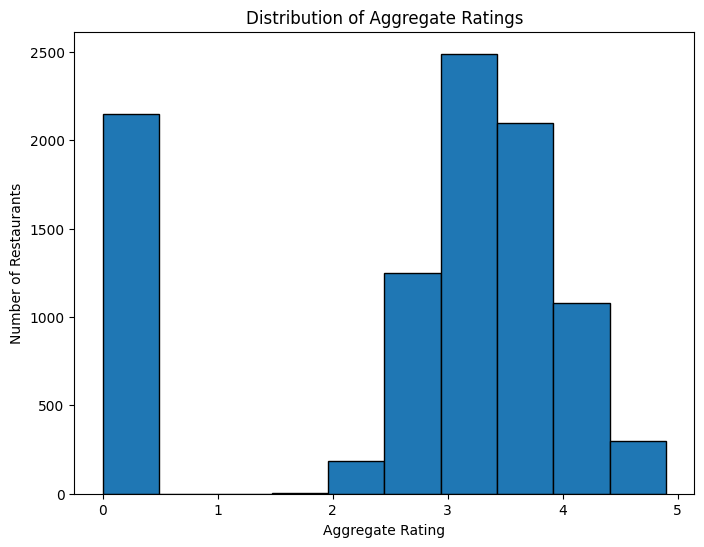

Most Common Rating Range: 0.0


In [ ]:
df = pd.read_csv("/content/Dataset.csv")

# Create a histogram to visualize the distribution of aggregate ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=10, edgecolor='k')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()

# Determine the most common rating range
most_common_rating_range = df['Aggregate rating'].mode()

print("Most Common Rating Range:", most_common_rating_range.values[0])


In [ ]:
# Calculate the average number of votes received by restaurants
avg_votes = df['Votes'].mean()
print("Average Number of Votes Received by Restaurants:", round(avg_votes, 2))


Average Number of Votes Received by Restaurants: 156.91


# Task 2: Cuisine Combination
    A. Identify the most common combinations of cuisines in the dataset.
    B. Determine if certain cuisine combinations tend to have higher ratings.

In [ ]:
# Drop rows with missing or empty 'Cuisines' values
df.dropna(subset=['Cuisines'], inplace=True)

# Split the 'Cuisines' column to get individual cuisines
cuisine_combinations = df['Cuisines'].str.split(', ')

# Flatten the list of cuisine combinations
all_cuisines = [cuisine for sublist in cuisine_combinations for cuisine in sublist]

# Calculate the most common cuisine combinations
common_cuisine_combinations = pd.Series(all_cuisines).value_counts()

# Display the most common combinations
print("Most Common Combinations of Cuisines:")
print(common_cuisine_combinations.head(10))  # You can adjust the number to see more or fewer combinations



Most Common Combinations of Cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [ ]:
# Calculate the average rating for each cuisine combination
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean()

# Sort the combinations by average rating in descending order
sorted_combinations = average_ratings.sort_values(ascending=False)

# Display the top-rated cuisine combinations
print("Top-Rated Cuisine Combinations:")
print(sorted_combinations.head(10))


Top-Rated Cuisine Combinations:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


# Task 3: Geographic Analysis
    A. Plot the locations of restaurants on a map using longitude and latitude coordinates.
    B. Identify any patterns or clusters of restaurants in specific areas.
    

In [ ]:

# Create a map centered at a specific location (e.g., city center)
m = folium.Map(location=[72.829976, 19.12663], zoom_start=2)

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(m)

# Add markers for restaurant locations to the cluster group
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
    ).add_to(marker_cluster)

# Display the map
m.save('restaurant_map.html')  # Save the map as an HTML file



In [ ]:

# Extract latitude and longitude coordinates
X = df[['Latitude', 'Longitude']]

# Apply DBSCAN clustering
eps = 0.1  # Adjust the epsilon value based on your data
min_samples = 5  # Adjust the minimum number of samples based on your data
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = db.labels_

# Create a map centered at a specific location (e.g., city center)
m = folium.Map(location=[72.829976, 19.12663], zoom_start=2)  # Replace with actual coordinates

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(m)

# Add markers for restaurant locations with cluster labels
for index, row in df.iterrows():
    if row['Cluster'] != -1:  # Exclude unclustered data points (-1 label)
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Restaurant: {row['Restaurant Name']}, Cluster: {row['Cluster']}",
        ).add_to(marker_cluster)

# Display the map
m.save('clustered_restaurant_map.html')  # Save the map as an HTML file



# Task 4: Restaurant Chains
    A. Identify if there are any restaurant chains present in the dataset.
    B. Analyze the ratings and popularity of different restaurant chains.

In [ ]:
# Group restaurants by name and count the number of locations
chain_counts = df['Restaurant Name'].value_counts()

# Filter chains by specifying a minimum number of locations
min_chain_locations = 2  # Adjust as needed
restaurant_chains = chain_counts[chain_counts >= min_chain_locations].index.tolist()

# Print the list of restaurant chains
print("Restaurant Chains:")
print(restaurant_chains)


Restaurant Chains:
['Cafe Coffee Day', "Domino's Pizza", 'Subway', 'Green Chick Chop', "McDonald's", 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins', 'Barbeque Nation', "Giani's", 'Barista', "Dunkin' Donuts", 'Pind Balluchi', 'Costa Coffee', 'Wah Ji Wah', 'Twenty Four Seven', 'Sagar Ratna', 'Pizza Hut Delivery', 'Starbucks', 'KFC', 'Republic of Chicken', 'Chaayos', "Haldiram's", 'Burger King', 'Shree Rathnam', 'Aggarwal Sweets', 'Frontier', 'Bikanervala', 'Moti Mahal Delux', 'Bikaner Sweets', 'Behrouz Biryani', "Karim's", '34, Chowringhee Lane', 'Chicago Pizza', 'Apni Rasoi', 'Burger Point', 'Wow! Momo', 'Madras Cafe', 'Gopala', "Nirula's Ice Cream", 'Sardar A Pure Meat Shop', 'Yo! China', 'Shama Chicken Corner', "Berco's", 'Cocoberry', 'Ovenstory Pizza', 'Angels in my Kitchen', 'Kebab Xpress', 'Faasos', 'Chowringhee', 'Punjabi Tadka', 'Punjabi Chaap Corner', 'Khan Chacha', "Tibb's Frankie", 'RollsKing', 'Slice of Italy', 'BTW', "Chawla's�_", 'Mocha', 'The Yellow Chilli', 'Chinese 

In [ ]:
#Top 10 restaurant chains who has highest number of chains

# Filter for restaurants that appear more than once (potential chains)
restaurant_chains = chain_counts[chain_counts > 1]

if not restaurant_chains.empty:
    print("Restaurant Chains Identified:")
    print(restaurant_chains.head(10))
else:
    print("No Restaurant Chains Identified in the Dataset.")


Restaurant Chains Identified:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [ ]:
# Filter the DataFrame to include only rows for restaurant chains
chain_df = df[df['Restaurant Name'].isin(restaurant_chains)]

# Calculate average ratings for each chain
chain_ratings = chain_df.groupby('Restaurant Name')['Aggregate rating'].mean()

# Calculate the total number of votes received by each chain
chain_votes = chain_df.groupby('Restaurant Name')['Votes'].sum()

# Combine the ratings and votes into a single DataFrame
chain_stats = pd.DataFrame({'Average Rating': chain_ratings, 'Total Votes': chain_votes})

# Sort the chains by average rating or total votes, as needed
chain_stats = chain_stats.sort_values(by='Average Rating', ascending=False)
# chain_stats = chain_stats.sort_values(by='Total Votes', ascending=False)

# Print the statistics for restaurant chains
print("Restaurant Chain Ratings and Popularity:")
print(chain_stats)


Restaurant Chain Ratings and Popularity:
Empty DataFrame
Columns: [Average Rating, Total Votes]
Index: []
